In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
df = pd.read_csv('data-10.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df.columns.tolist()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [9]:
df.drop(columns=['id'], inplace=True)


In [10]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: xlabel='gender'>

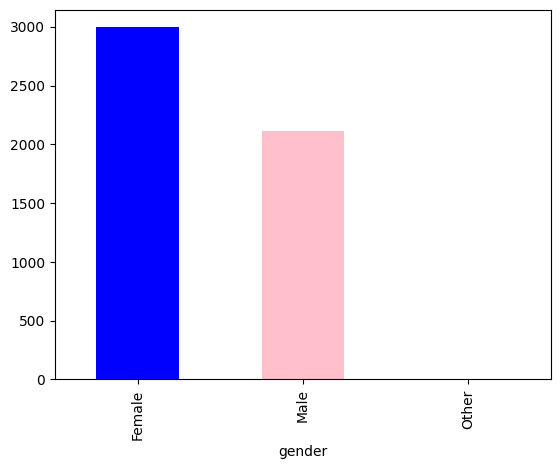

In [11]:
df.gender.value_counts().plot(kind='bar', color=['blue', 'pink','green'])

In [12]:
df['gender'] = le.fit_transform(df['gender'])

In [13]:
df.ever_married.value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [14]:
df["ever_married"] = le.fit_transform(df["ever_married"])  

In [15]:
df.work_type.value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["work_type"] = le.fit_transform(df["work_type"])


In [17]:
df.work_type.value_counts()

work_type
2    2925
3     819
4     687
0     657
1      22
Name: count, dtype: int64

In [18]:
df.Residence_type.value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [19]:
df["Residence_type"] = le.fit_transform(df["Residence_type"])

In [20]:
df.smoking_status.value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [21]:
df["smoking_status"] = le.fit_transform(df["smoking_status"])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [23]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

(array([ 411., 1964., 1809.,  575.,  105.,   37.,    4.,    2.,    0.,
           2.]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 <BarContainer object of 10 artists>)

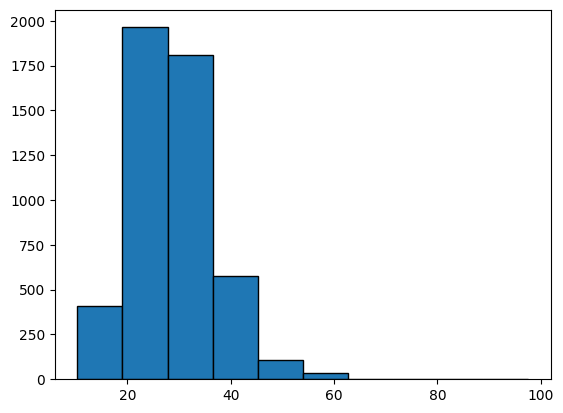

In [24]:
plt.hist(df["bmi"],edgecolor='black')

<Axes: xlabel='bmi', ylabel='Density'>

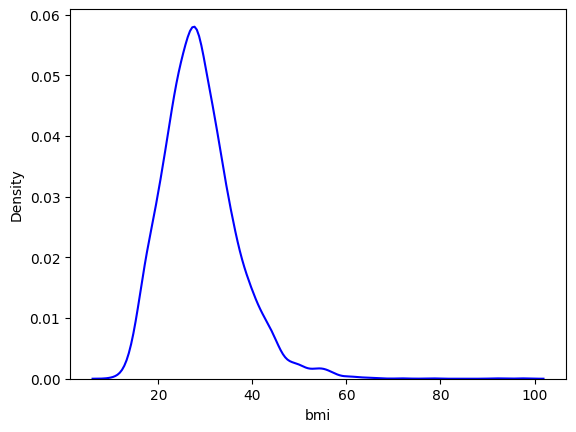

In [25]:
sns.kdeplot(df["bmi"], color='blue')

In [26]:
df['bmi'].skew() # 	> 0 → right-skewed (positive skew)

np.float64(1.0553402052962912)

In [27]:
df['bmi'].fillna(df['bmi'].median(), inplace=True)

C:\Users\Aditi k\AppData\Local\Temp\ipykernel_22596\1439978410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


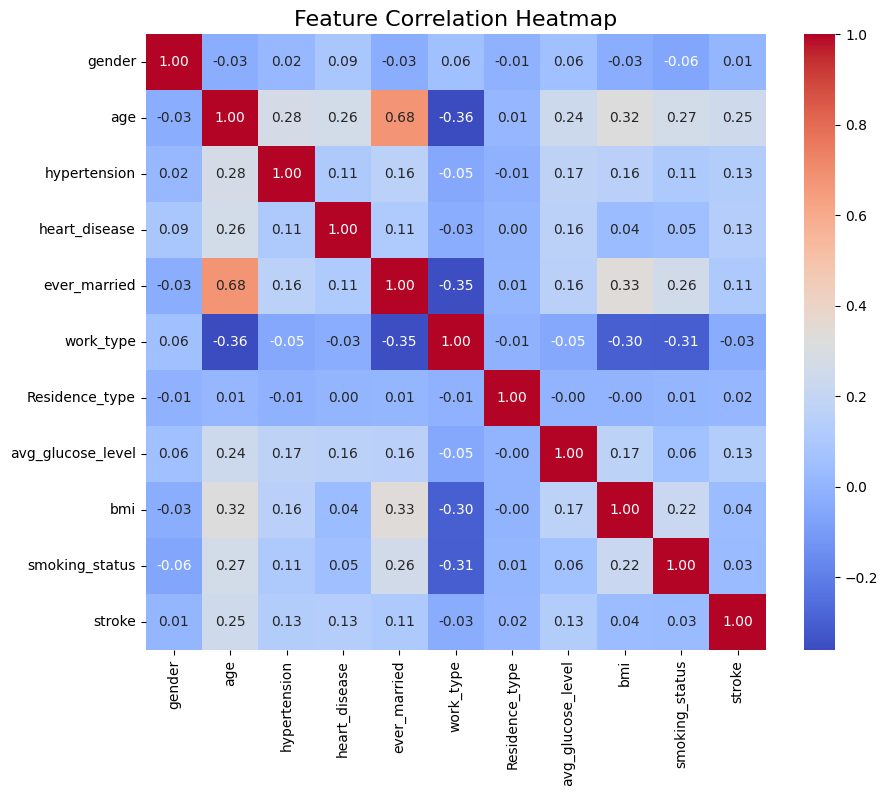

In [28]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

In [29]:
# lets train the model now

from sklearn.model_selection import train_test_split

X = df.drop("stroke", axis=1)
y = df["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8679060665362035
Confusion Matrix:
 [[858 102]
 [ 33  29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93       960
           1       0.22      0.47      0.30        62

    accuracy                           0.87      1022
   macro avg       0.59      0.68      0.61      1022
weighted avg       0.92      0.87      0.89      1022



In [32]:
## homework for this project -> plot the ROC curve, visual confusion matrix, and boxplot

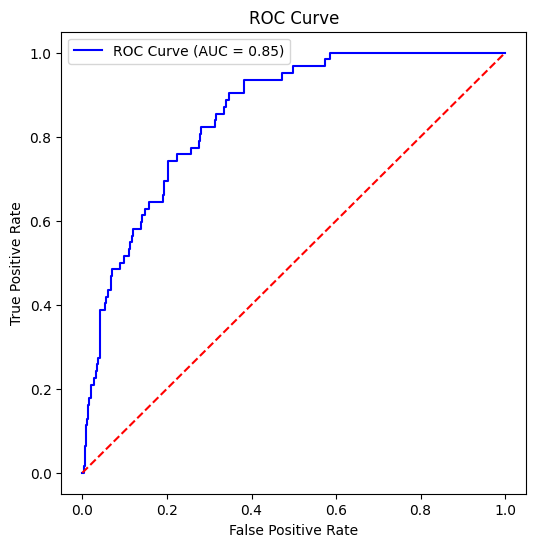

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]   # probability scores
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

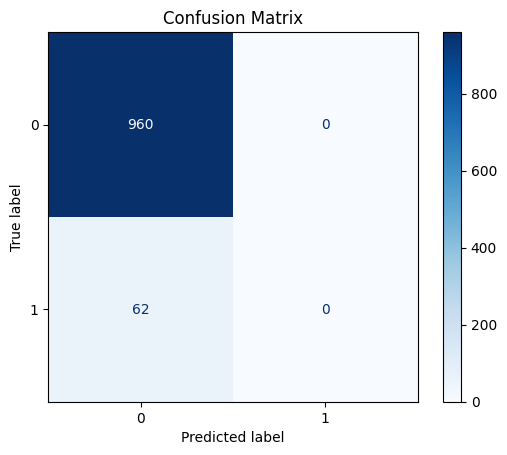

In [35]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

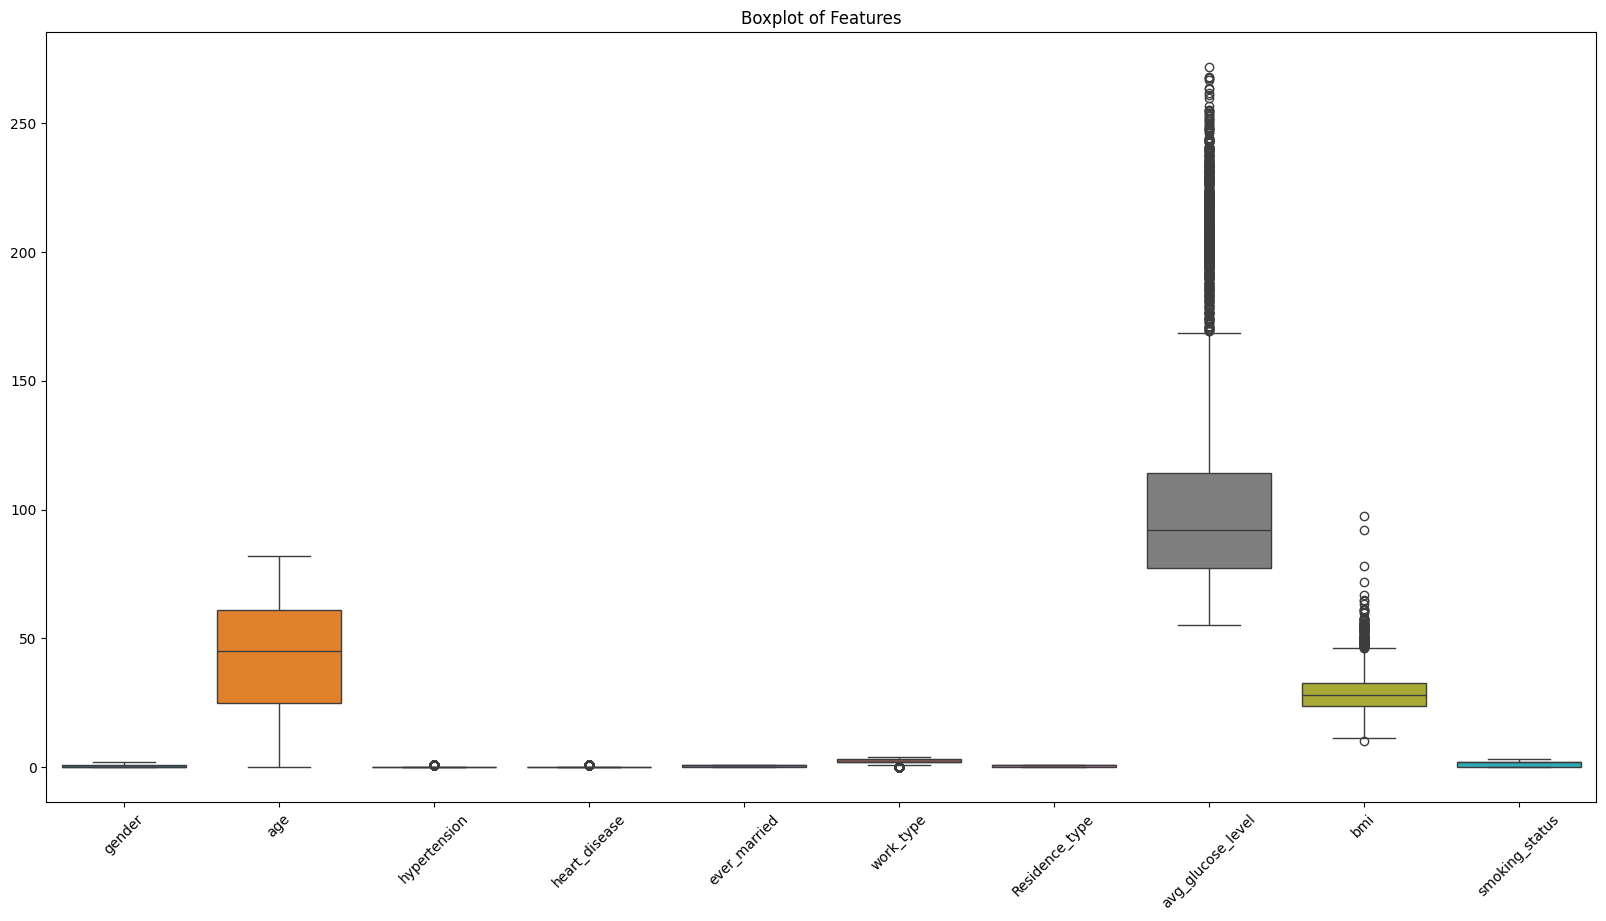

In [46]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df.drop('stroke', axis=1))
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()